# H1B Data Analysis

**BY: Cyndi Wang and Jared Liu**

**H-1B is one of the most common visa status applied for in the US. Here, we want to uncover insights to help employers understand the process, as well as providing insights for international students to better decide which occupations to choose or which companies to work for to get a better chance to stay in the US.**
<br>

We aim to answer mainly the following two questions:<br>
<br>
**1. Predict whether or not an H1B application will be approved or denied**<br>

**2. Which factors are more important in this process? ( Salary? Occupation? ) 
<br>
<br>
This notebook is divided into four parts, <br>
I. Load and Combine Data<br> 
II. Exploratory Data Analysis<br> 
III. Data Modeling<br> 
IV. Recommendations and Future Work**

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I. Load and combine data

**We have 3 years of data downloaded from United State Department of Labor website. 
The original dataset has 260 columns for 2019 and about 50 columns for 2018 and 2017, we first handpicked 27 columns that we feel are most relavant to our prediction task. The combined file has 1943626 records.**

data link:  https://www.foreignlaborcert.doleta.gov/performancedata.cfm#dis 

In [5]:
df1 = pd.read_csv('H-1B_Disclosure_Data_FY2019.csv')

In [6]:
df1.shape

(1048547, 260)

Index([&#39;CASE_NUMBER&#39;, &#39;CASE_STATUS&#39;, &#39;CASE_SUBMITTED&#39;, &#39;DECISION_DATE&#39;,
       &#39;ORIGINAL_CERT_DATE&#39;, &#39;VISA_CLASS&#39;, &#39;JOB_TITLE&#39;, &#39;SOC_CODE&#39;,
       &#39;SOC_TITLE&#39;, &#39;FULL_TIME_POSITION&#39;,
       ...
       &#39;PW_OTHER_SOURCE_10&#39;, &#39;PW_NON-OES_YEAR_10&#39;, &#39;PW_SURVEY_PUBLISHER_10&#39;,
       &#39;PW_SURVEY_NAME_10&#39;, &#39;H-1B_DEPENDENT&#39;, &#39;WILLFUL_VIOLATOR&#39;,
       &#39;SUPPORT_H1B&#39;, &#39;STATUTORY_BASIS&#39;, &#39;MASTERS_EXEMPTION&#39;,
       &#39;PUBLIC_DISCLOSURE&#39;],
      dtype=&#39;object&#39;, length=260)

In [6]:
picked_cols_1 = ['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'SOC_CODE', 'FULL_TIME_POSITION', 
               'PERIOD_OF_EMPLOYMENT_START_DATE', 'PERIOD_OF_EMPLOYMENT_END_DATE', 'TOTAL_WORKER_POSITIONS',
               'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
               'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 
               'NAICS_CODE', 'AGENT_REPRESENTING_EMPLOYER', 'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1', 
               'PREVAILING_WAGE_1', 'PW_UNIT_OF_PAY_1', 'PW_WAGE_LEVEL_1', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR']

In [7]:
len(picked_cols_1)

27

In [8]:
df1_select_col = df1[picked_cols_1]

In [9]:
df1_select_col["docFY"] = "2019"

In [10]:
df2 = pd.read_csv('H-1B_Disclosure_Data_FY2018_EOY.csv')

In [11]:
picked_cols_2 = ['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'SOC_CODE', 'FULL_TIME_POSITION', 
               'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 
               'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMP', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME', 
               'EMPLOYER_CITY', 'EMPLOYER_STATE', 'NAICS_CODE', 'AGENT_REPRESENTING_EMPLOYER', 'WAGE_RATE_OF_PAY_FROM', 
               'WAGE_UNIT_OF_PAY', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR']

In [12]:
df2_select_col = df2[picked_cols_2]
df2_select_col["docFY"] = "2018"

In [13]:
df2_select_col.columns = df1_select_col.columns

In [14]:
df3 = pd.read_csv('H-1B_Disclosure_Data_FY17.csv')

In [15]:
picked_cols_3 = ['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'SOC_CODE', 'FULL_TIME_POSITION', 
               'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 
               'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME', 
               'EMPLOYER_CITY', 'EMPLOYER_STATE', 'NAICS_CODE', 'AGENT_REPRESENTING_EMPLOYER', 'WAGE_RATE_OF_PAY_FROM', 
               'WAGE_UNIT_OF_PAY', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR']

In [16]:
df3_select_col = df3[picked_cols_3]
df3_select_col["docFY"] = "2017"

In [17]:
df3_select_col.columns = df1_select_col.columns

In [18]:
frames = [df1_select_col, df2_select_col, df3_select_col]
picked_df = pd.concat(frames, sort=False, ignore_index=True)

In [20]:
picked_df.head()

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,SOC_CODE,FULL_TIME_POSITION,PERIOD_OF_EMPLOYMENT_START_DATE,PERIOD_OF_EMPLOYMENT_END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,...,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,PW_WAGE_LEVEL_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,docFY
0,WITHDRAWN,4/8/16,4/30/19,H-1B,11-2011,Y,10/1/16,9/30/19,1.0,0,...,541810,NaN,"$179,000.00",Year,NaN,NaN,NaN,N,N,2019
1,WITHDRAWN,7/14/17,5/13/19,E-3 Australian,11-2011,Y,10/1/17,10/1/19,1.0,0,...,541810,NaN,"$110,000.00",Year,NaN,NaN,NaN,NaN,NaN,2019
2,WITHDRAWN,8/23/17,4/30/19,E-3 Australian,11-2011,Y,9/11/17,9/11/19,1.0,0,...,541810,NaN,"$275,000.00",Year,NaN,NaN,NaN,NaN,NaN,2019
3,WITHDRAWN,12/22/17,8/20/19,E-3 Australian,11-2011,Y,1/8/18,1/7/20,1.0,0,...,541810,NaN,"$140,000.00",Year,NaN,NaN,NaN,NaN,NaN,2019
4,WITHDRAWN,1/10/18,4/15/19,E-3 Australian,11-2011,Y,2/1/18,2/1/20,1.0,0,...,541810,NaN,"$180,000.00",Year,NaN,NaN,NaN,NaN,NaN,2019


In [21]:
# delete rows where case status is missing
picked_df = picked_df[picked_df.CASE_STATUS.notna()]

In [22]:
picked_df.shape

(1943626, 28)

In [23]:
picked_df.to_csv("picked_df_new.csv", index=False)

# II. Exploratory Data Analysis

**For this part, we try to explore the dataset to gain some insights of how features look like and their relationship with the final case status. Therefore, it is divided into three parts.** <br>
<br>
**i. Data Cleaning<br>
ii. Feature Engineering<br>
iii. Data Visualization**

In [29]:
picked_df = pd.read_csv('picked_df_new.csv')

## i. Data Cleaning

This part cleans the data by deleting or imputing missing values.

In [30]:
# check missing values
len(picked_df) - picked_df.count()

CASE_STATUS                             0
CASE_SUBMITTED                          1
DECISION_DATE                           0
VISA_CLASS                              0
SOC_CODE                               17
FULL_TIME_POSITION                     11
PERIOD_OF_EMPLOYMENT_START_DATE        36
PERIOD_OF_EMPLOYMENT_END_DATE          41
TOTAL_WORKER_POSITIONS                  2
NEW_EMPLOYMENT                          0
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
NEW_CONCURRENT_EMPLOYMENT               1
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
EMPLOYER_NAME                          85
EMPLOYER_CITY                          31
EMPLOYER_STATE                        132
NAICS_CODE                             15
AGENT_REPRESENTING_EMPLOYER        124674
WAGE_RATE_OF_PAY_FROM_1                 8
WAGE_UNIT_OF_PAY_1                     29
PREVAILING_WAGE_1                   33251
PW_UNIT_OF_PAY_1                  

In [31]:
# delete observations with few missing column values
picked_df.dropna(subset=['CASE_SUBMITTED', 'SOC_CODE', 'FULL_TIME_POSITION', 'PERIOD_OF_EMPLOYMENT_START_DATE',
                         'PERIOD_OF_EMPLOYMENT_END_DATE', 'TOTAL_WORKER_POSITIONS', 'NEW_CONCURRENT_EMPLOYMENT', 
                         'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'NAICS_CODE', 'WAGE_RATE_OF_PAY_FROM_1', 
                         'WAGE_UNIT_OF_PAY_1'], inplace=True)

In [32]:
# impute values for the columns listed below, we can safely assume missing values means "N"
picked_df.loc[picked_df['AGENT_REPRESENTING_EMPLOYER'].isna(), 'AGENT_REPRESENTING_EMPLOYER'] = 'N'
picked_df.loc[picked_df['H-1B_DEPENDENT'].isna(), 'H-1B_DEPENDENT'] = 'N'
picked_df.loc[picked_df['WILLFUL_VIOLATOR'].isna(), 'WILLFUL_VIOLATOR'] = 'N'

In [33]:
picked_df.PW_WAGE_LEVEL_1.value_counts()

Level II     831188
Level I      425454
Level III    291985
Level IV     168771
Name: PW_WAGE_LEVEL_1, dtype: int64

In [34]:
# impute missing PW_WAGE_LEVEL_1 with mode Level II 
picked_df.loc[picked_df['PW_WAGE_LEVEL_1'].isna(), 'PW_WAGE_LEVEL_1'] = 'Level II'

In [35]:
# clean wage values
picked_df.WAGE_RATE_OF_PAY_FROM_1 = picked_df.WAGE_RATE_OF_PAY_FROM_1.replace('[\$,]', '', regex=True).astype(float)
picked_df.PREVAILING_WAGE_1 = picked_df.PREVAILING_WAGE_1.replace('[\$,]', '', regex=True).astype(float)

In [36]:
# to confirm no missing values except prevailing wage/unit of pay, which will be solved later.
len(picked_df) - picked_df.count()

CASE_STATUS                            0
CASE_SUBMITTED                         0
DECISION_DATE                          0
VISA_CLASS                             0
SOC_CODE                               0
FULL_TIME_POSITION                     0
PERIOD_OF_EMPLOYMENT_START_DATE        0
PERIOD_OF_EMPLOYMENT_END_DATE          0
TOTAL_WORKER_POSITIONS                 0
NEW_EMPLOYMENT                         0
CONTINUED_EMPLOYMENT                   0
CHANGE_PREVIOUS_EMPLOYMENT             0
NEW_CONCURRENT_EMPLOYMENT              0
CHANGE_EMPLOYER                        0
AMENDED_PETITION                       0
EMPLOYER_NAME                          0
EMPLOYER_CITY                          0
EMPLOYER_STATE                         0
NAICS_CODE                             0
AGENT_REPRESENTING_EMPLOYER            0
WAGE_RATE_OF_PAY_FROM_1                0
WAGE_UNIT_OF_PAY_1                     0
PREVAILING_WAGE_1                  33235
PW_UNIT_OF_PAY_1                   33321
PW_WAGE_LEVEL_1 

## ii. Feature Engineering

In this part, we create new features that might be more correlated with case status.

**HOURLY_WAGE**: WAGE_RATE_OF_PAY_FROM_1 / WAGE_UNIT_OF_PAY_1

In [37]:
picked_df['WORK_HOURS'] = picked_df['WAGE_UNIT_OF_PAY_1'].map({'Year': 2080, 'Month': 160, 'Bi-Weekly': 80, 'Week': 40, 'Hour': 1})
picked_df['WAGE_HOURLY'] = picked_df['WAGE_RATE_OF_PAY_FROM_1'] / picked_df['WORK_HOURS']
# correct for wrong unit of pay
picked_df.loc[(picked_df['WAGE_HOURLY'] > 1000) & (picked_df['WAGE_UNIT_OF_PAY_1'] != 'Year'), 'WORK_HOURS'] = 2080
picked_df['WAGE_HOURLY'] = picked_df['WAGE_RATE_OF_PAY_FROM_1'] / picked_df['WORK_HOURS']
picked_df['WAGE_HOURLY'] = picked_df['WAGE_HOURLY'].clip(0, 1000) # clip outliers

**PW_WAGE_HOURLY**: PREVAILING_WAGE_1 / PW_UNIT_OF_PAY_1

In [38]:
picked_df['PW_WORK_HOURS'] = picked_df['PW_UNIT_OF_PAY_1'].map({'Year': 2080, 'Month': 160, 'Bi-Weekly': 80, 'Week': 40, 'Hour': 1})
picked_df['PW_WAGE_HOURLY'] = picked_df['PREVAILING_WAGE_1'] / picked_df['PW_WORK_HOURS']
# correct for wrong unit of pay
picked_df.loc[(picked_df['PW_WAGE_HOURLY'] > 1000) & (picked_df['PW_UNIT_OF_PAY_1'] != 'Year'), 'PW_WORK_HOURS'] = 2080
picked_df['PW_WAGE_HOURLY'] = picked_df['PREVAILING_WAGE_1'] / picked_df['PW_WORK_HOURS']
picked_df['PW_WAGE_HOURLY'] = picked_df['PW_WAGE_HOURLY'].clip(0, 1000) # clip outliers

In [39]:
# impute PW_WAGE_HOURLY with WAGE_HOURLY
picked_df['PW_WAGE_HOURLY'].fillna(picked_df['WAGE_HOURLY'], inplace=True)

**WAGE_DIFF**: WAGE_HOURLY - PW_WAGE_HOURLY<br>
Our intuition is that if someone's wage is lower than prevailing wage, then the case has much higer chance of being denied.

In [40]:
picked_df["WAGE_DIFF"] = picked_df["WAGE_HOURLY"] - picked_df["PW_WAGE_HOURLY"]

**EMPLOY_PERIOD**: based on start and end date.<br>
Our intuition here is that the longer someone get employed with same employer, he shows the loyalty and then the visa is more likely to be approved.

In [41]:
import datetime
picked_df['PERIOD_OF_EMPLOYMENT_END_DATE'] = picked_df['PERIOD_OF_EMPLOYMENT_END_DATE'].astype('datetime64[ns]') 
picked_df['PERIOD_OF_EMPLOYMENT_START_DATE'] = picked_df['PERIOD_OF_EMPLOYMENT_START_DATE'].astype('datetime64[ns]') 

In [42]:
picked_df['EMPLOY_PERIOD'] = picked_df['PERIOD_OF_EMPLOYMENT_END_DATE'] - picked_df['PERIOD_OF_EMPLOYMENT_START_DATE']

In [43]:
picked_df['EMPLOY_PERIOD'] = picked_df['EMPLOY_PERIOD'].astype(str)
picked_df['EMPLOY_PERIOD'] = picked_df['EMPLOY_PERIOD'].apply(lambda x: x.split()[0])
picked_df['EMPLOY_PERIOD'] = picked_df['EMPLOY_PERIOD'].astype(int)

**CASE_PROCESSING_TIME**: DECISION_DATE - CASE_SUBMITTED <br>
Our intuition here is that when a case takes a long time to process, the officer is doing a more thorough investigation because they have doubts, and thus, the case gets a higher chance to be denied.

In [44]:
picked_df['CASE_SUBMITTED'] = picked_df['CASE_SUBMITTED'].apply(lambda x: x.split()[0])

In [45]:
picked_df['DECISION_DATE'] = picked_df['DECISION_DATE'].astype('datetime64[ns]') 
picked_df['CASE_SUBMITTED'] = picked_df['CASE_SUBMITTED'].astype('datetime64[ns]')
picked_df['CASE_PROCESSING_TIME'] = picked_df['DECISION_DATE'] - picked_df['CASE_SUBMITTED']

In [46]:
picked_df['CASE_PROCESSING_TIME'] = picked_df['CASE_PROCESSING_TIME'].astype(str)
picked_df['CASE_PROCESSING_TIME'] = picked_df['CASE_PROCESSING_TIME'].apply(lambda x: x.split()[0])
picked_df['CASE_PROCESSING_TIME'] = picked_df['CASE_PROCESSING_TIME'].astype(int)

**INDUSTRY**: based on NAICS_CODE (first two numbers) <br>
We do not need too detailed sub categories of the industry, so only the big industry categories is good enough.
reference: https://www.naics.com/search/

In [47]:
picked_df['INDUSTRY'] = picked_df['NAICS_CODE'].astype(str).apply(lambda s: s[:2])

**OCCUPATION**: based on SOC_CODE (first two numbers) <br>
Same as industry above, we do not need too detailed job title information so we try to extract occupation big categories.<br>
reference: https://www.bls.gov/soc/2018/major_groups.htm

In [48]:
picked_df['OCCUPATION'] = picked_df['SOC_CODE'].str.split('-', expand=True)[0]
picked_df['OCCUPATION'] = picked_df['OCCUPATION'].apply(lambda s: s[:2])

#### Convert all columns to the right type

In [49]:
picked_df.TOTAL_WORKER_POSITIONS = picked_df.TOTAL_WORKER_POSITIONS.astype(int)
picked_df = picked_df[picked_df.CONTINUED_EMPLOYMENT!="B"]
picked_df.CONTINUED_EMPLOYMENT = picked_df.CONTINUED_EMPLOYMENT.astype(int)
picked_df.NEW_CONCURRENT_EMPLOYMENT = picked_df.NEW_CONCURRENT_EMPLOYMENT.astype(int)
picked_df.CHANGE_PREVIOUS_EMPLOYMENT = picked_df.CHANGE_PREVIOUS_EMPLOYMENT.astype(int)
picked_df.NEW_EMPLOYMENT = picked_df.NEW_EMPLOYMENT.astype(int)
picked_df.AMENDED_PETITION = picked_df.AMENDED_PETITION.astype(int)
picked_df.CHANGE_EMPLOYER = picked_df.CHANGE_EMPLOYER.astype(int)
picked_df = picked_df[picked_df.INDUSTRY != "&N"]
picked_df.INDUSTRY = picked_df.INDUSTRY.astype(int)
picked_df = picked_df[~picked_df.OCCUPATION.isin(['SO', 'EL', 'CO','EN', 'ME', 'AC', 'AI'])]
picked_df = picked_df[picked_df.OCCUPATION != "OP"]
picked_df.OCCUPATION = picked_df.OCCUPATION.astype(int)

In [50]:
len(picked_df) - picked_df.count()

CASE_STATUS                            0
CASE_SUBMITTED                         0
DECISION_DATE                          0
VISA_CLASS                             0
SOC_CODE                               0
FULL_TIME_POSITION                     0
PERIOD_OF_EMPLOYMENT_START_DATE        0
PERIOD_OF_EMPLOYMENT_END_DATE          0
TOTAL_WORKER_POSITIONS                 0
NEW_EMPLOYMENT                         0
CONTINUED_EMPLOYMENT                   0
CHANGE_PREVIOUS_EMPLOYMENT             0
NEW_CONCURRENT_EMPLOYMENT              0
CHANGE_EMPLOYER                        0
AMENDED_PETITION                       0
EMPLOYER_NAME                          0
EMPLOYER_CITY                          0
EMPLOYER_STATE                         0
NAICS_CODE                             0
AGENT_REPRESENTING_EMPLOYER            0
WAGE_RATE_OF_PAY_FROM_1                0
WAGE_UNIT_OF_PAY_1                     0
PREVAILING_WAGE_1                  33235
PW_UNIT_OF_PAY_1                   33321
PW_WAGE_LEVEL_1 

The data is now ready to be used in Tableau for visualization 

In [51]:
picked_df.to_csv('tableau_use_new.csv', index=False)

## iii. Data Visualization

**This part is done in Tableau. See detailed work in EDA.twbx, some notable results are displayed below.**

In [6]:
%%HTML 
<div class='tableauPlaceholder' id='viz1588624690723' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;CSVSYear&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='H1B_15886243643700&#47;CSVSYear' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;CSVSYear&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1588624690723');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [7]:
%%HTML 
<div class='tableauPlaceholder' id='viz1588624726960' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;OccupationVSCS&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='H1B_15886243643700&#47;OccupationVSCS' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;OccupationVSCS&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1588624726960');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [8]:
%%HTML 
<div class='tableauPlaceholder' id='viz1588624756483' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;IndustryVSCS&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='H1B_15886243643700&#47;IndustryVSCS' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;IndustryVSCS&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1588624756483');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [4]:
%%HTML 
<div class='tableauPlaceholder' id='viz1588624399752' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;OccupationVSWage&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='H1B_15886243643700&#47;OccupationVSWage' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;OccupationVSWage&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1588624399752');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [9]:
%%HTML 
<div class='tableauPlaceholder' id='viz1588624781227' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;DIFFVSCS&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='H1B_15886243643700&#47;DIFFVSCS' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;H1&#47;H1B_15886243643700&#47;DIFFVSCS&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1588624781227');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Some key findings from data visualization: <br>
1. As for basic distributions, this is a highly imbalanced dataset, over 97% cases are certified, and only around 2% are denied. Most applications were for H-1B (general) applications and came from California, Texas and New Jersey.
2. Certified rate keeps increasing through the years.
3. Individual wage lower than prevailing wage is very likely to result in denial.
4. Job positions in technology, engineering, business have higher certified rate.
5. Employers with agent representing and being H-1B dependent, and applications for full time positions have a positive influence on certified rate.

# III. Data Modeling


Our objective in this phase is to develop a model which can tell us whether an individual will be rejected or approved of a H1B visa based on various characteristics in the data. We will only look at case status of 'CERTIFIED' and 'DENIED'. <br>

This part is divided into four parts. <br>
1. Data Preprocessing
2. Model Selection
3. Prediction
4. Model Interpretation

In [52]:
picked_df = pd.read_csv('tableau_use_new.csv')

## i. Data Preprocessing

##### a. Drop columns that are not used for modeling.

In [53]:
drop_columns = ["CASE_SUBMITTED", "DECISION_DATE", "SOC_CODE", "PERIOD_OF_EMPLOYMENT_START_DATE", 
                "PERIOD_OF_EMPLOYMENT_END_DATE", "NAICS_CODE", "WAGE_RATE_OF_PAY_FROM_1", "WAGE_UNIT_OF_PAY_1", 
                "PREVAILING_WAGE_1", "PW_UNIT_OF_PAY_1", "WORK_HOURS", "PW_WORK_HOURS", "EMPLOYER_NAME", 
                "EMPLOYER_CITY", "EMPLOYER_STATE"]

In [54]:
model_df = picked_df.drop(drop_columns, axis=1)

In [55]:
model_df.shape

(1943293, 22)

In [56]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943293 entries, 0 to 1943292
Data columns (total 22 columns):
CASE_STATUS                    object
VISA_CLASS                     object
FULL_TIME_POSITION             object
TOTAL_WORKER_POSITIONS         int64
NEW_EMPLOYMENT                 int64
CONTINUED_EMPLOYMENT           int64
CHANGE_PREVIOUS_EMPLOYMENT     int64
NEW_CONCURRENT_EMPLOYMENT      int64
CHANGE_EMPLOYER                int64
AMENDED_PETITION               int64
AGENT_REPRESENTING_EMPLOYER    object
PW_WAGE_LEVEL_1                object
H-1B_DEPENDENT                 object
WILLFUL_VIOLATOR               object
docFY                          int64
WAGE_HOURLY                    float64
PW_WAGE_HOURLY                 float64
WAGE_DIFF                      float64
EMPLOY_PERIOD                  int64
CASE_PROCESSING_TIME           int64
INDUSTRY                       int64
OCCUPATION                     int64
dtypes: float64(3), int64(12), object(7)
memory usage: 326.2

In [57]:
model_df.to_csv("model_df_new.csv", index=False) # save for convenience

##### b. For our analysis, we consider CERTIFIED and DENIED cases only.

In [58]:
model_df = pd.read_csv('model_df_new.csv')

In [59]:
model_df.CASE_STATUS.unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [60]:
binary_df = model_df[(model_df["CASE_STATUS"]=='CERTIFIED')|(model_df["CASE_STATUS"]=='DENIED')]

In [61]:
binary_df.CASE_STATUS.value_counts()

CERTIFIED    1717043
DENIED         22931
Name: CASE_STATUS, dtype: int64

**This is a highly imbalanced data, the vast majority of cases are certified while denied cases are only around 1% of it. before we fit our model, we need to get a more balanced data for modeling purpose.**

**Our method: Undersampling<br>
Keep all the denied cases(22931) and randomly select 23000 certified cases so that we have half and half both cases in the data.**

In [62]:
denied_cases = model_df[model_df["CASE_STATUS"]=='DENIED']
approved_cases = model_df[model_df["CASE_STATUS"]=='CERTIFIED']
ran_select_approve_case = approved_cases.sample(n=23000, replace=True, random_state=123) 
frames = [ran_select_approve_case, denied_cases]
combined_df = pd.concat(frames, sort=False, ignore_index=True)
combined_df = combined_df.sort_index()

In [63]:
combined_df.CASE_STATUS.value_counts()

CERTIFIED    23000
DENIED       22931
Name: CASE_STATUS, dtype: int64

convert y column to numerical value

In [66]:
# map column values to integers
combined_df.CASE_STATUS = combined_df.CASE_STATUS.map({"CERTIFIED": 0, "DENIED": 1})

In [67]:
combined_df.to_csv('undersampled_model_df.csv', index=False) # save for convenience

##### c. Choose label and features for modeling

In [68]:
combined_df = pd.read_csv('undersampled_model_df.csv')

In [69]:
label = 'CASE_STATUS'
features = ['PW_WAGE_LEVEL_1', 'WAGE_HOURLY', 'WAGE_DIFF', 'CASE_PROCESSING_TIME', 'INDUSTRY', 'OCCUPATION', 
            'AGENT_REPRESENTING_EMPLOYER', 'H-1B_DEPENDENT', 'FULL_TIME_POSITION']

In [70]:
cont_features = ['WAGE_HOURLY', 'WAGE_DIFF', 'CASE_PROCESSING_TIME']
dis_features = ['PW_WAGE_LEVEL_1', 'INDUSTRY', 'OCCUPATION', 
                'AGENT_REPRESENTING_EMPLOYER', 'H-1B_DEPENDENT', 'FULL_TIME_POSITION']

In [71]:
y = combined_df[label]
X = combined_df[features]

##### d. Separate train and test dataset

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

##### e. Transform some features on training set

In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [74]:
ohe = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

In [75]:
ct = make_column_transformer(
      (sc, cont_features),
      (ohe, dis_features),
      remainder="passthrough"
)

In [76]:
ct.fit(X_train)
transformed_X_train = ct.transform(X_train)

## ii. Model Selection

The models we tried in this stage include:<br>
<br>
**Logistic Regression**<br>
<br>
**Decision Tree**<br>
<br>
**Random Forest**<br>
<br>
**XG boost**<br>
<br>
Here, we list some of the metrics that are used for choosing hyperparameters.

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Note: All the parameter grids in the following CV are chosen from multiple iterations, just to narrow it down to reduce the training time.

In [78]:
def cv_for_model_selection(model, parameters, verbose=False):
    '''
    A decorator for GridSearchCV that can print out important information.
    '''
    scores = ['accuracy', 'f1']
    for score in scores:
        params = parameters
        print("# Scoring: %s" % score)
        clf = GridSearchCV(model, params, scoring=score, n_jobs=-1)
        clf.fit(transformed_X_train, y_train)
        print('Best Params: ', clf.best_params_)
        print('Best Score: ', clf.best_score_)
        if verbose:
            print("Grid scores:")
            means = clf.cv_results_['mean_test_score']
            stds = clf.cv_results_['std_test_score']
            for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                print("Mean: %0.3f, std: %0.4f, mean / std: %0.3f for %r" % (mean, std, mean / std, params))

### Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr_params = {'C': np.array([0.01, 0.1, 1, 10])}
cv_for_model_selection(lgr, lgr_params)

NameError: name 'np' is not defined

In [84]:
lgr_cv = LogisticRegression(C=0.1)
lgr_cv.fit(transformed_X_train, y_train)
lgr_pred_y_train = lgr_cv.predict(transformed_X_train)
print('Accuracy: ', accuracy_score(y_train, lgr_pred_y_train))
print('Precision: ', precision_score(y_train, lgr_pred_y_train))
print('Recall: ', recall_score(y_train, lgr_pred_y_train))
print('F1: ', f1_score(y_train, lgr_pred_y_train))
print('ROC_AUC: ', roc_auc_score(y_train, lgr_pred_y_train))

Accuracy:  0.7954307942405945
Precision:  0.815226209048362
Recall:  0.7617492711370263
F1:  0.7875810097965336
ROC_AUC:  0.7952867063281385


### Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_params = {'max_depth': np.arange(9, 15), 'min_impurity_decrease': [1e-5, 3e-5, 1e-4, 3e-4, 1e-3]}
cv_for_model_selection(dt, dt_params)

# Scoring: accuracy
Best Params:  {'max_depth': 12, 'min_impurity_decrease': 0.0001}
Best Score:  0.855666476562518
# Scoring: f1
Best Params:  {'max_depth': 11, 'min_impurity_decrease': 0.0001}
Best Score:  0.8451146952086249


In [86]:
dt_cv = DecisionTreeClassifier(max_depth=12, min_impurity_decrease=0.0001)
dt_cv.fit(transformed_X_train, y_train)
dt_pred_y_train = dt_cv.predict(transformed_X_train)
print('Accuracy: ', accuracy_score(y_train, dt_pred_y_train))
print('Precision: ', precision_score(y_train, dt_pred_y_train))
print('Recall: ', recall_score(y_train, dt_pred_y_train))
print('F1: ', f1_score(y_train, dt_pred_y_train))
print('ROC_AUC: ', roc_auc_score(y_train, dt_pred_y_train))

Accuracy:  0.8680039479795634
Precision:  0.9116743973345528
Recall:  0.8137026239067056
F1:  0.8599069538158177
ROC_AUC:  0.8677716495646374


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf_params = {'max_depth': [17, 18, 19, 20, 21], 'min_impurity_decrease': [1e-9, 3e-9, 1e-8, 3e-8]}
cv_for_model_selection(rf, rf_params, verbose=True)

# Scoring: accuracy
Best Params:  {'max_depth': 20, 'min_impurity_decrease': 1e-08}
Best Score:  0.8619077804564649
Grid scores:
Mean: 0.860, std: 0.0024, mean / std: 364.978 for {'max_depth': 17, 'min_impurity_decrease': 1e-09}
Mean: 0.860, std: 0.0022, mean / std: 395.541 for {'max_depth': 17, 'min_impurity_decrease': 3e-09}
Mean: 0.860, std: 0.0015, mean / std: 583.800 for {'max_depth': 17, 'min_impurity_decrease': 1e-08}
Mean: 0.860, std: 0.0019, mean / std: 464.017 for {'max_depth': 17, 'min_impurity_decrease': 3e-08}
Mean: 0.860, std: 0.0028, mean / std: 305.004 for {'max_depth': 18, 'min_impurity_decrease': 1e-09}
Mean: 0.860, std: 0.0029, mean / std: 300.225 for {'max_depth': 18, 'min_impurity_decrease': 3e-09}
Mean: 0.860, std: 0.0020, mean / std: 420.900 for {'max_depth': 18, 'min_impurity_decrease': 1e-08}
Mean: 0.860, std: 0.0030, mean / std: 287.283 for {'max_depth': 18, 'min_impurity_decrease': 3e-08}
Mean: 0.861, std: 0.0020, mean / std: 424.652 for {'max_depth': 19, 'mi

In [92]:
rf_cv = RandomForestClassifier(max_depth=21, min_impurity_decrease=3e-8, n_jobs=-1)
rf_cv.fit(transformed_X_train, y_train)
rf_pred_y_train = rf_cv.predict(transformed_X_train)
print('Accuracy: ', accuracy_score(y_train, rf_pred_y_train))
print('Precision: ', precision_score(y_train, rf_pred_y_train))
print('Recall: ', recall_score(y_train, rf_pred_y_train))
print('F1: ', f1_score(y_train, rf_pred_y_train))
print('ROC_AUC: ', roc_auc_score(y_train, rf_pred_y_train))

Accuracy:  0.9381967022758941
Precision:  0.9764638710905285
Recall:  0.8974927113702624
F1:  0.9353143134931486
ROC_AUC:  0.9380225725888195


### XGBoost

In [93]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1)

In [97]:
xgb_params = {'max_depth': [5, 6, 7, 8, 9], 
              'n_estimators': [150, 160, 170, 180], 
              'learning_rate': [0.05, 0.1, 0.2, 0.3]}
cv_for_model_selection(xgb, xgb_params)

# Scoring: accuracy
Best Params:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}
Best Score:  0.8653913171352239
# Scoring: f1
Best Params:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}
Best Score:  0.8566198841629646


In [98]:
xgb_cv = XGBClassifier(learning_rate=0.1, max_depth=8, n_estimators=150, n_jobs=-1)
xgb_cv.fit(transformed_X_train, y_train)
xgb_pred_y_train = xgb_cv.predict(transformed_X_train)
print('Accuracy: ', accuracy_score(y_train, xgb_pred_y_train))
print('Precision: ', precision_score(y_train, xgb_pred_y_train))
print('Recall: ', recall_score(y_train, xgb_pred_y_train))
print('F1: ', f1_score(y_train, xgb_pred_y_train))
print('ROC_AUC: ', roc_auc_score(y_train, xgb_pred_y_train))

Accuracy:  0.8911692986530423
Precision:  0.9415485996705107
Recall:  0.8331195335276967
F1:  0.8840216550657386
ROC_AUC:  0.8909209645901865


**Comparing all the models above, we decided to pick *Random Forest*. It has highest scores on all metrics, especially on recall (86%), since we should focus more on the false negatives in this H1B scenario, as companies don't want to predict as certified when it is likely to be denied.**
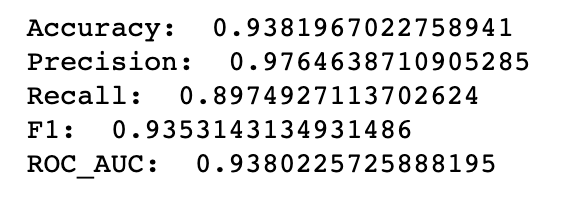

## iii. Prediction

We now use random forest to make predictions on the test set that was previously set aside, also, we produce classification report and confusion matrix to see model performance.

In [99]:
# transform X_test
transformed_X_test = ct.transform(X_test)

In [100]:
from sklearn.metrics import classification_report
y_pred = rf_cv.predict(transformed_X_test)
print('Classification metrics:')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('ROC_AUC: ', roc_auc_score(y_test, y_pred))
print()
print('Classfication report:')
target_names = ['CERTIFIED', 'DENIED']
print(classification_report(y_test, y_pred, target_names=target_names))

Classification metrics:
Accuracy:  0.8630148915788557
Precision:  0.893418100224383
Recall:  0.8265006054315862
F1:  0.8586575613262648
ROC_AUC:  0.8632678404218612

Classfication report:
              precision    recall  f1-score   support

   CERTIFIED       0.84      0.90      0.87      5702
      DENIED       0.89      0.83      0.86      5781

    accuracy                           0.86     11483
   macro avg       0.86      0.86      0.86     11483
weighted avg       0.87      0.86      0.86     11483



In [101]:
from sklearn.metrics import confusion_matrix
errors = confusion_matrix(y_test, y_pred).ravel()
lst = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
ratios = [i / sum(errors) for i in errors]
for pair in zip(lst, errors, ratios):
    print(pair)

('True Negative', 5132, 0.44692153618392405)
('False Positive', 570, 0.04963859618566577)
('False Negative', 1003, 0.08734651223547853)
('True Positive', 4778, 0.41609335539493164)


Our model performs quite well, the accuracy is around 85%. We can see FP is 4.9% and FN is 8.7%. We want low FN. The precision and recall are pretty high, too (both are above 83%).

## iv. Model Interpretation

We would like to see feature importance performed on decision tree and random forest.

In [104]:
def change_name(s):
    return s.replace('x0', 'WAGE').replace('x1', 'INDUSTRY').replace('x2', 'OCCUPATION').replace('x3', 'AGENT').replace('x4', 'H1B_DEPENDENT').replace('x5', 'FULL_TIME')

In [105]:
ohe_columns = list(ct.named_transformers_['onehotencoder'].get_feature_names())
ohe_columns = [change_name(s) for s in ohe_columns]
all_columns = cont_features + ohe_columns
feature_importance = sorted(list(zip(all_columns, list(rf_cv.feature_importances_))), key=lambda t: t[1], reverse=True)
feature_importance[:10]

[('CASE_PROCESSING_TIME', 0.49154946837485003),
 ('WAGE_DIFF', 0.16572094467815887),
 ('WAGE_HOURLY', 0.13078329784194093),
 ('OCCUPATION_15', 0.02999307811132406),
 ('H1B_DEPENDENT_N', 0.026880870796380674),
 ('H1B_DEPENDENT_Y', 0.023416531468234723),
 ('AGENT_N', 0.012650406125077878),
 ('INDUSTRY_54', 0.012211583968689483),
 ('AGENT_Y', 0.009988382992717496),
 ('WAGE_Level II', 0.0069890830534043305)]

Based on the above result, we can see that for our best performing models, the processing time, some specific occupations (**15-comp&math**) and industries (**54-sci&tech services**), the wage, whether employer is H-1B dependent and has agents, can all be important in the decision making process.

But if we want to put our model into production, we don't have processing time available. But this is an indication that the application's completeness, detailness and truthfulness will greatly influence the final decision. And this is something we cannot see directly from the objective values(wage,occupation). 

So we will train a model without processing time for production purpose, and we expect the performance to go down.

Below we try to rule out case processing time so that our model can be used for prediction.

In [106]:
label = 'CASE_STATUS'
features_new = ['PW_WAGE_LEVEL_1', 'WAGE_HOURLY', 'WAGE_DIFF', 'INDUSTRY', 'OCCUPATION', 
                'AGENT_REPRESENTING_EMPLOYER', 'H-1B_DEPENDENT', 'FULL_TIME_POSITION']
cont_features_new = ['WAGE_HOURLY', 'WAGE_DIFF']
dis_features_new = ['PW_WAGE_LEVEL_1', 'INDUSTRY', 'OCCUPATION', 
                    'AGENT_REPRESENTING_EMPLOYER', 'H-1B_DEPENDENT', 'FULL_TIME_POSITION']
y = combined_df[label]
X_new = combined_df[features_new]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, random_state=0) # same split
ct = make_column_transformer(
      (sc, cont_features_new),
      (ohe, dis_features_new),
      remainder="passthrough")
ct.fit(X_train_new)
transformed_X_train_new = ct.transform(X_train_new)

In [107]:
# Random Forest
rf_cv_new = RandomForestClassifier(max_depth=22, min_impurity_decrease=3e-6, n_jobs=-1)
rf_cv_new.fit(transformed_X_train_new, y_train_new)
rf_pred_y_train_new = rf_cv_new.predict(transformed_X_train_new)
print('Train:')
print('Accuracy: ', accuracy_score(y_train_new, rf_pred_y_train_new))
print('Precision: ', precision_score(y_train_new, rf_pred_y_train_new))
print('Recall: ', recall_score(y_train_new, rf_pred_y_train_new))
print('F1: ', f1_score(y_train_new, rf_pred_y_train_new))
print('ROC_AUC: ', roc_auc_score(y_train_new, rf_pred_y_train_new))

Train:
Accuracy:  0.8237923827217836
Precision:  0.8774356179315983
Recall:  0.7509620991253644
F1:  0.8092874198818649
ROC_AUC:  0.8234808183220764


In [108]:
transformed_X_test_new = ct.transform(X_test_new)
y_pred_new = rf_cv_new.predict(transformed_X_test_new)
print('Predict:')
print('Accuracy: ', accuracy_score(y_test_new, y_pred_new))
print('Precision: ', precision_score(y_test_new, y_pred_new))
print('Recall: ', recall_score(y_test_new, y_pred_new))
print('F1: ', f1_score(y_test_new, y_pred_new))
print('ROC_AUC: ', roc_auc_score(y_test_new, y_pred_new))
print()
print('Classfication report:')
target_names = ['CERTIFIED', 'DENIED']
print(classification_report(y_test_new, y_pred_new, target_names=target_names))

Predict:
Accuracy:  0.7269006357223722
Precision:  0.7612087695042465
Recall:  0.6666666666666666
F1:  0.7108078199926227
ROC_AUC:  0.7273179001519934

Classfication report:
              precision    recall  f1-score   support

   CERTIFIED       0.70      0.79      0.74      5702
      DENIED       0.76      0.67      0.71      5781

    accuracy                           0.73     11483
   macro avg       0.73      0.73      0.73     11483
weighted avg       0.73      0.73      0.73     11483



In [109]:
errors_new = confusion_matrix(y_test_new, y_pred_new).ravel()
lst = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
ratios_new = [i / sum(errors_new) for i in errors_new]
for pair in zip(lst, errors_new, ratios_new):
    print(pair)

('True Negative', 4493, 0.39127405730209874)
('False Positive', 1209, 0.10528607506749108)
('False Negative', 1927, 0.16781328921013672)
('True Positive', 3854, 0.33562657842027344)


All the metrics have worth performance now than for the previous model, which are expected. 

In [110]:
all_columns_new = cont_features_new + ohe_columns
feature_importance = sorted(list(zip(all_columns_new, list(rf_cv_new.feature_importances_))), key=lambda t: t[1], reverse=True)
feature_importance[:10]

[('WAGE_DIFF', 0.3364867740387131),
 ('WAGE_HOURLY', 0.24315501744782916),
 ('H1B_DEPENDENT_Y', 0.0692926079683526),
 ('OCCUPATION_15', 0.05795626234646132),
 ('H1B_DEPENDENT_N', 0.042686877846894816),
 ('AGENT_N', 0.026680144886044733),
 ('AGENT_Y', 0.02566794172494949),
 ('INDUSTRY_54', 0.02435789491285857),
 ('OCCUPATION_11', 0.012347167583135324),
 ('WAGE_Level II', 0.011837949142535897)]

The factors are similar to the previous model.

## IV. Recommendations and Future Work

### i. Recommendations

Based on exploratory data analysis and our random forest model result, we have some recommendations for applying for H-1B.
<br>
1. Wage. Being lower than prevailing wage can significantly affect the result. In this case, employers should rasie the wage to match the prevailing wage. Students should also pay attention to the offer package and make negotiations if needed.
2. Occupation. It is hard for one to change its career. Therefore, we suggest students who are not in occupations like technology should take serious consideration.
3. Employers with agent representing and H-1B dependent, applications for full time positions have a positive influence on certified rate, which can help students choose between the offers.

### ii. Future work

There are a few things that can be done to improve our model. <br>
1. Sampling method: Our current undersampling method reduces the data size drastically, which may have lost some important information. Alternative approaches like oversampling or anomaly detection without sampling can be tried. <br>
2. Feature engineering: There are still room for engineering more relevant features after researching deeper into this field.
3. Complex models: Models like Neural Networks can be applied to model more complex relationship.
4. We might see if our binary classification can be expanded to multi classification, see if we can also predict whether a case will withdrawn or not.